In [33]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [34]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [35]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
# df.info()

In [36]:
# df.head()

In [37]:
excel_file = 'temp-data/lesson3.xlsx'

df.to_excel(excel_file, index=False)
print('Done')

Done


In [38]:
df = pd.read_excel(excel_file, 0, index_col='StatusDate')

# df.dtypes
# df.index
# df.head()

In [39]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [40]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [41]:
# Only grab where Status == 1
mask = df['Status'] == 1
df = df[mask]
df

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291
...,...,...,...
2012-06-18,FL,1,669
2012-08-06,TX,1,178
2012-08-20,TX,1,248


In [42]:
# Convert NJ to NY
mask = df['State'] == 'NJ'
df['State'][mask] = 'NY'

df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

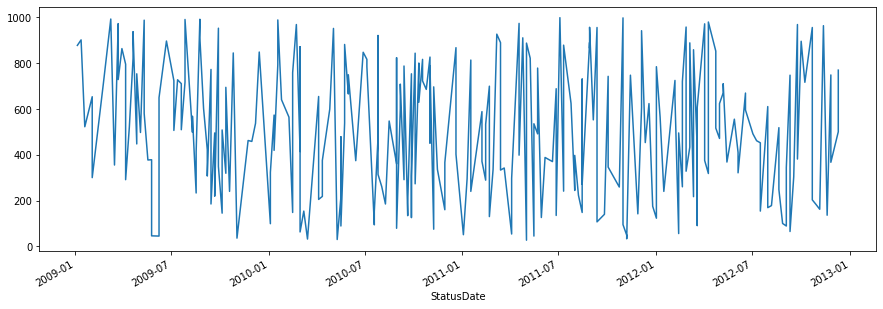

In [43]:
df['CustomerCount'].plot(figsize=(15,5));

In [44]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [45]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

In [46]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [47]:
Daily.index

MultiIndex([('FL', '2009-01-12'),
            ('FL', '2009-02-02'),
            ('FL', '2009-03-23'),
            ('FL', '2009-04-06'),
            ('FL', '2009-06-08'),
            ('FL', '2009-07-06'),
            ('FL', '2009-07-13'),
            ('FL', '2009-07-20'),
            ('FL', '2009-08-10'),
            ('FL', '2009-08-24'),
            ...
            ('TX', '2012-01-09'),
            ('TX', '2012-02-27'),
            ('TX', '2012-03-12'),
            ('TX', '2012-04-23'),
            ('TX', '2012-04-30'),
            ('TX', '2012-08-06'),
            ('TX', '2012-08-20'),
            ('TX', '2012-08-27'),
            ('TX', '2012-09-03'),
            ('TX', '2012-10-29')],
           names=['State', 'StatusDate'], length=239)

In [48]:
# Select the State index
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [49]:
# Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name='StatusDate', length=161, freq=None)

<AxesSubplot:xlabel='StatusDate'>

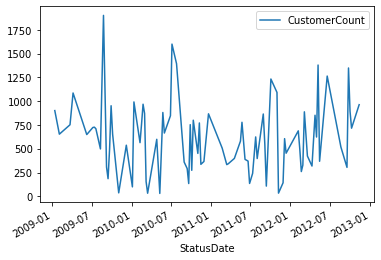

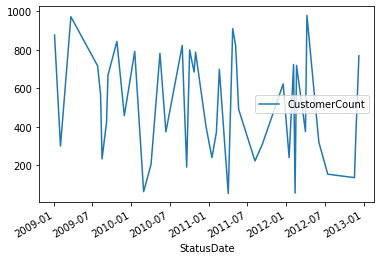

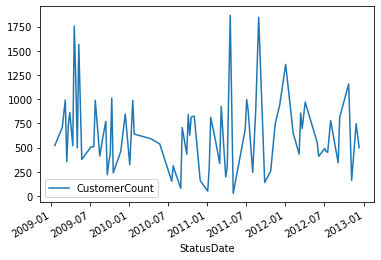

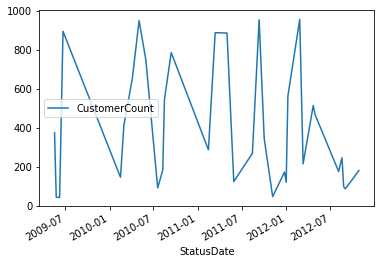

In [50]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

<AxesSubplot:xlabel='StatusDate'>

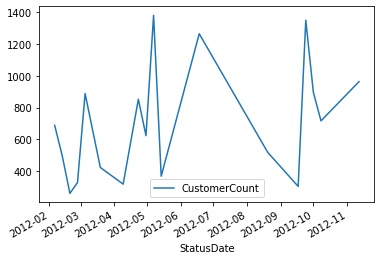

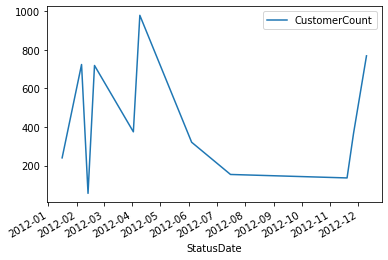

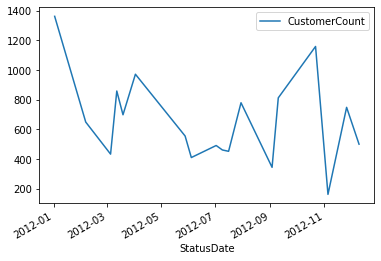

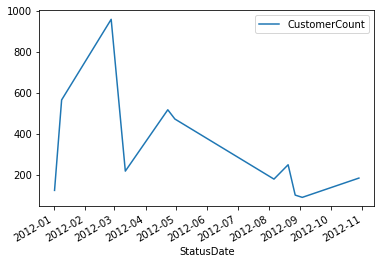

In [51]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot()

In [52]:
# Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

In [53]:
Daily.head()

CustomerCount  Lower   Upper  Outlier
State StatusDate                                       
FL    2009-01-12            901  450.5  1351.5    False
      2009-02-02            653  326.5   979.5    False
      2009-03-23            752  376.0  1128.0    False
      2009-04-06           1086  543.0  1629.0    False
      2009-06-08            649  324.5   973.5    False

In [54]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


In [55]:
# pd.date_range?
# Create the BHAG dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [56]:
# Combine the BHAG and the ALL data set 
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,CustomerCount,Max,BHAG
2012-11-19,136.0,1115.0,NaN
2012-11-26,1115.0,1115.0,NaN
2012-12-10,1269.0,1269.0,NaN
2012-12-31,NaN,NaN,2000.0
2013-12-31,NaN,NaN,3000.0


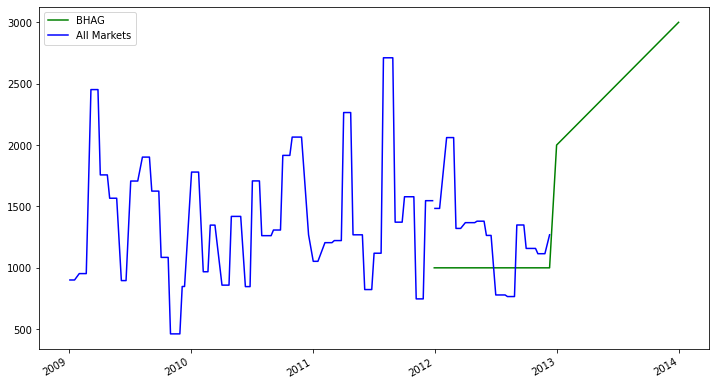

In [57]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');

In [58]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,CustomerCount,Max,BHAG
2009,2452.0,2452.0,NaN
2010,2065.0,2065.0,NaN
2011,2711.0,2711.0,1000.0
2012,2061.0,2061.0,2000.0
2013,NaN,NaN,3000.0


In [59]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,CustomerCount,Max,BHAG,YR_PCT_Change
2009,2452.0,2452.0,NaN,NaN
2010,2065.0,2065.0,NaN,-0.157830
2011,2711.0,2711.0,1000.0,0.312833
2012,2061.0,2061.0,2000.0,-0.239764
2013,NaN,NaN,3000.0,0.000000


In [60]:
(1 + Year.loc[2012,'YR_PCT_Change']) * Year.loc[2012,'Max']

1566.8465510881595

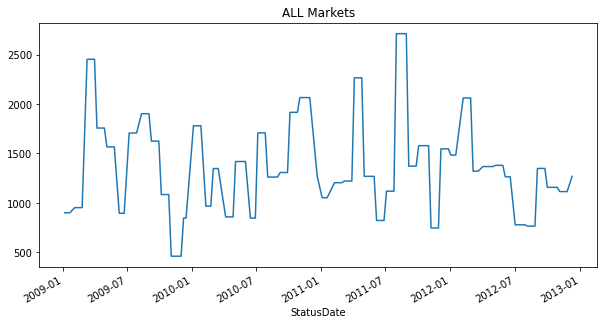

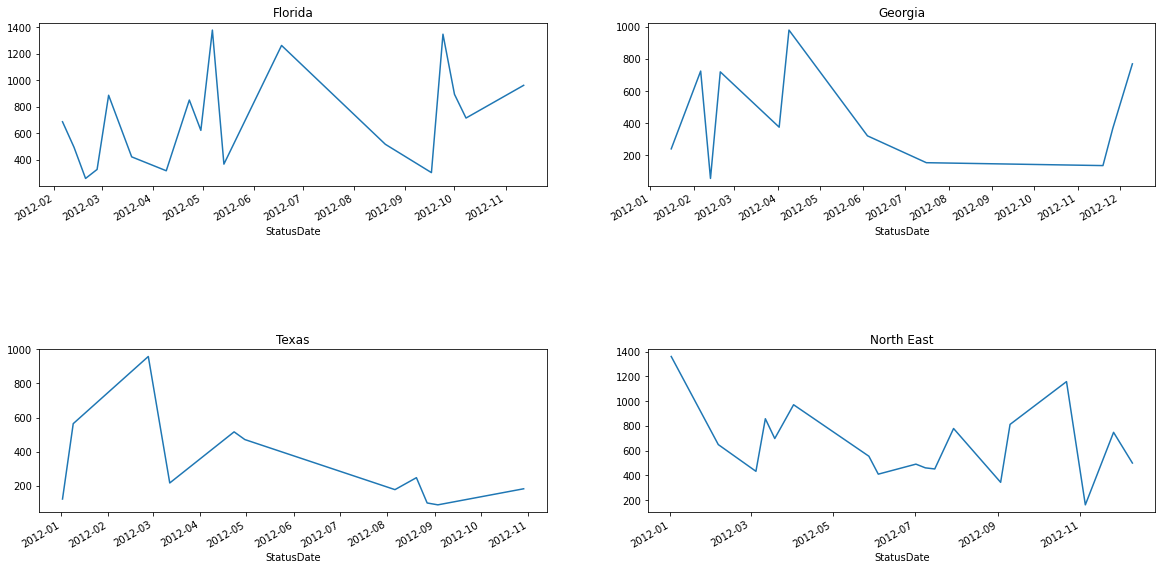

In [61]:
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');

In [63]:
# Delete the excel file
import os

if os.path.exists(excel_file):
    os.remove(excel_file)
    
print('File is deleted')

File is deleted
